In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

## Q1. Downloading the data

We'll use [the same NYC taxi dataset](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page),
but instead of "Green Taxi Trip Records", we'll use "For-Hire Vehicle Trip Records" 

Download the data for January and February 2021

Note that you need "For-Hire Vehicle Trip Records", not "High Volume For-Hire Vehicle Trip Records".

In [ ]:
df_jan = pd.read_parquet('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet')

In [ ]:
df_jan.shape

Read the data for January. How many records are there?

* 1054112
* **1154112(+)**
* 1254112
* 1354112

## Q2. Computing duration

Now let's compute the `duration` variable. It should contain the duration of a ride in minutes. 

In [5]:
duration = pd.to_datetime(df_jan['dropOff_datetime']) - pd.to_datetime(df_jan['pickup_datetime'])
duration = duration.apply(lambda x: x.total_seconds() / 60)

In [6]:
duration.mean()

19.167224093791006

What's the average trip duration in January?

* 15.16
* **19.16(+)**
* 24.16
* 29.16

## Data preparation

Check the distribution of the duration variable. There are some outliners. 

Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

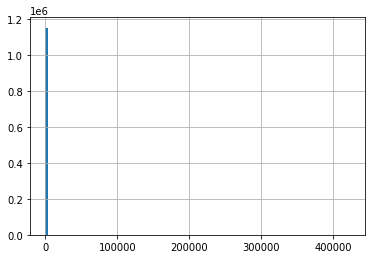

In [7]:
plt.hist(duration, bins=100)
plt.grid()

In [8]:
target_mask = (duration >= 1) & (duration <= 60)
duration_clip = duration.loc[target_mask]
df_jan = df_jan.loc[target_mask]

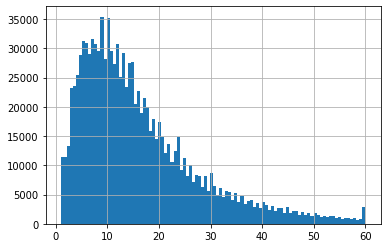

In [9]:
plt.hist(duration_clip, bins=100)
plt.grid()

In [10]:
duration.shape[0] - duration_clip.shape[0]

44286

How many records did you drop? 
- 44286

## Q3. Missing values

The features we'll user for our model are the pickup and dropoff location IDs. 

But they have a lot of missing values there. Let's replace them with "-1"

In [11]:
df_jan['PUlocationID'].isna().value_counts(normalize=True)

True     0.835273
False    0.164727
Name: PUlocationID, dtype: float64

What's the factions of missing values for the pickup location ID? (Or the fraction of "-1"s after you filled the NAs)

* 53%
* 63%
* 73%
* **83%(+)**

In [12]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)

## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

In [13]:
columns = ['PUlocationID', 'DOlocationID']
jan_dict = df_jan[columns].astype(str).to_dict(orient='records')

dv = DictVectorizer()
jan_sparse = dv.fit_transform(jan_dict)

In [14]:
jan_sparse

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

What's the dimensionality of this matrix? (The number of columns)

* 2
* 152
* 352
* **525(+)**
* 725

## Q5. Training a model

Now let's use the feature matrix from the previous step to train a model. 

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data

In [15]:
X_train = jan_sparse
y_train = duration_clip

lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_train)
score = mean_squared_error(y_train, preds, squared=False)

In [16]:
score

10.528519107210952

What's the RMSE on train?

* 5.52
* **10.52(+)**
* 15.52
* 20.52

## Q6. Evaluating the model

Now let's apply this model to the validation dataset (Feb 2021). 

In [24]:
df_feb = pd.read_parquet('https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet')

In [25]:
duration_feb = pd.to_datetime(df_feb['dropOff_datetime']) - pd.to_datetime(df_feb['pickup_datetime'])
duration_feb = duration_feb.apply(lambda x: x.total_seconds() / 60)

In [27]:
df_feb['PUlocationID'] = df_feb['PUlocationID'].fillna(-1)
df_feb['DOlocationID'] = df_feb['DOlocationID'].fillna(-1)

In [32]:
target_mask_val = (duration_feb >= 1) & (duration_feb <= 60)
duration_feb = duration_feb.loc[target_mask_val]
df_feb = df_feb.loc[target_mask_val]

In [33]:
feb_sparse = dv.transform(df_feb[columns].astype(str).to_dict(orient='records'))

X_val = feb_sparse
y_val = duration_feb

In [34]:
X_val

<990113x525 sparse matrix of type '<class 'numpy.float64'>'
	with 1980223 stored elements in Compressed Sparse Row format>

In [35]:
y_val.shape

(990113,)

In [36]:
val_preds = lr.predict(X_val)
val_score = mean_squared_error(y_val, val_preds, squared=False)
val_score

11.014283179608368

What's the RMSE on validation?

* 6.01
* **11.01(+)**
* 16.01
* 21.01

## Submit the results

Submit your results here: https://forms.gle/V8q5rv7QRoZ13Sft6

It's possible that your answers won't match exactly. If it's the case, select the closest one.